In [1]:
import numpy as np
from IPython.display import display_svg
from mindquantum.core.circuit import Circuit
from mindquantum.core.gates import UnivMathGate
from utils import circuit_depth, qutrit_symmetric_ansatz


def count_gates(ansatz):
    gates = {\
        'single': {'X': 0, 'RY': 0, 'RZ': 0, 'GP': 0},
        'ctrl1': {'C_X': 0, 'C_RY': 0, 'C_RZ': 0, 'C_GP': 0},
        'ctrl2': {'CC_X': 0, 'CC_RY': 0, 'CC_RZ': 0, 'CC_GP': 0},
        'ctrl3': {'CCC_X': 0, 'CCC_RY': 0, 'CCC_RZ': 0, 'CCC_GP': 0}
    }
    for g in ansatz:
        l = len(g.ctrl_qubits)
        if l > 0:
            gates[f'ctrl{l}'][f'{"C"*l}_{g.name}'] += 1
        else:
            gates['single'][g.name] += 1
    return gates

Number of qubits: 2
Number of gates: 25
Number of params: 9
Depth of circuit: 23


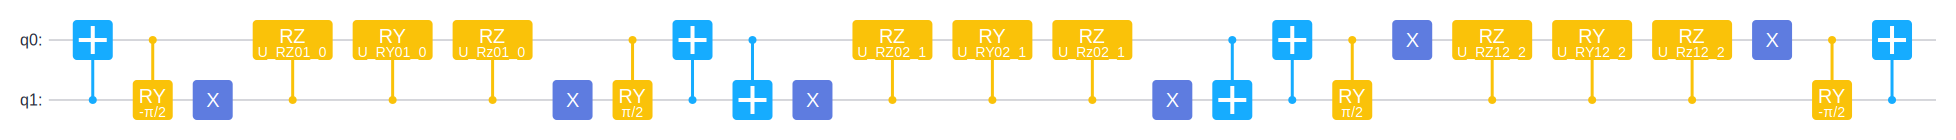

{'single': {'X': 6, 'RY': 0, 'RZ': 0, 'GP': 0},
 'ctrl1': {'C_X': 6, 'C_RY': 7, 'C_RZ': 6, 'C_GP': 0},
 'ctrl2': {'CC_X': 0, 'CC_RY': 0, 'CC_RZ': 0, 'CC_GP': 0},
 'ctrl3': {'CCC_X': 0, 'CCC_RY': 0, 'CCC_RZ': 0, 'CCC_GP': 0}}

In [2]:
nq = 2
mat = np.eye(2**nq)
gate = UnivMathGate('U', mat).on(range(nq))
ansatz = qutrit_symmetric_ansatz(gate)
p_name = ansatz.ansatz_params_name
p_num = len(p_name)
g_num = sum(1 for _ in ansatz)
depth = circuit_depth(ansatz)

p_name = ansatz.ansatz_params_name
p_num = len(p_name)
g_num = sum(1 for _ in ansatz)
depth = circuit_depth(ansatz)
gates = count_gates(ansatz)
print(f'Number of qubits: {nq}')
print(f'Number of gates: {g_num}')
print(f'Number of params: {p_num}')
print(f'Depth of circuit: {depth}')
display_svg(ansatz.svg())
gates

In [3]:
nq = 4
mat = np.eye(2**nq)
gate = UnivMathGate('U', mat).on(range(nq))
ansatz = qutrit_symmetric_ansatz(gate)
p_name = ansatz.ansatz_params_name
p_num = len(p_name)
g_num = sum(1 for _ in ansatz)
depth = circuit_depth(ansatz)

p_name = ansatz.ansatz_params_name
p_num = len(p_name)
g_num = sum(1 for _ in ansatz)
depth = circuit_depth(ansatz)
gates = count_gates(ansatz)
print(f'Number of qubits: {nq}')
print(f'Number of gates: {g_num}')
print(f'Number of params: {p_num}')
print(f'Depth of circuit: {depth}')
display_svg(ansatz.svg())
gates

Number of qubits: 4
Number of gates: 518
Number of params: 102
Depth of circuit: 422


{'single': {'X': 74, 'RY': 16, 'RZ': 0, 'GP': 0},
 'ctrl1': {'C_X': 70, 'C_RY': 63, 'C_RZ': 54, 'C_GP': 0},
 'ctrl2': {'CC_X': 64, 'CC_RY': 0, 'CC_RZ': 0, 'CC_GP': 0},
 'ctrl3': {'CCC_X': 104, 'CCC_RY': 48, 'CCC_RZ': 10, 'CCC_GP': 15}}

In [4]:
layers = 2
d = 3  # dimension of qudit state
k = 6  # number of gates in one layer
nq = (k + 1) * (d - 1)  # number of qubits
ansatz = Circuit()  # qutrit symmetric ansatz
for i in range(layers):
    for j in range(k):
        name = f'G{j + 1}_L{i + 1}'
        mat = np.eye(2**(2 * (d - 1)))
        obj = list(range(nq - (d - 1) * (j + 2), nq - (d - 1) * j))
        gate_u = UnivMathGate(name, mat).on(obj)
        ansatz += qutrit_symmetric_ansatz(gate_u)

p_name = ansatz.ansatz_params_name
p_num = len(p_name)
g_num = sum(1 for _ in ansatz)
depth = circuit_depth(ansatz)
gates = count_gates(ansatz)
print(f'Number of qubits: {nq}')
print(f'Number of gates: {g_num}')
print(f'Number of params: {p_num}')
print(f'Depth of circuit: {depth}')
gates

Number of qubits: 14
Number of gates: 6216
Number of params: 1224
Depth of circuit: 1366


{'single': {'X': 888, 'RY': 192, 'RZ': 0, 'GP': 0},
 'ctrl1': {'C_X': 840, 'C_RY': 756, 'C_RZ': 648, 'C_GP': 0},
 'ctrl2': {'CC_X': 768, 'CC_RY': 0, 'CC_RZ': 0, 'CC_GP': 0},
 'ctrl3': {'CCC_X': 1248, 'CCC_RY': 576, 'CCC_RZ': 120, 'CCC_GP': 180}}